## Preparing data for Machine Learning model

#### Project Name - Exploratory Data Analysis on  titanic dataset

Aim - Analyze the titanic_train dataset and identify how many passenger's survived or deceased.

#### dataset = https://github.com/krishnaik06/EDA1/blob/master/titanic_train.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('Titanic_train.xlsx')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

### Missing Values

In [5]:
#Let's see total number of missing values for each column and percentage of that.

total = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total , percentage] , axis = 1 , keys = ['Total' , 'Percent'])

missing_values

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


#### We can also represent missing values in terms of visualization.

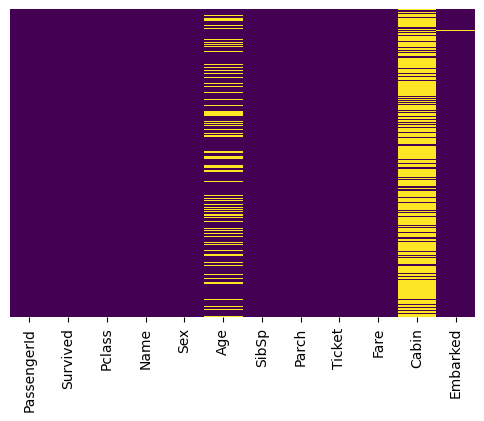

In [6]:
#Graphical representation of Missing Values 

plt.figure(figsize=(6,4))
sns.heatmap(train.isnull() , yticklabels=False , cbar = False ,cmap = 'viridis')
plt.show()

### Observation:
We can see that approx 20% of data is missing in Age column and around 77% in Cabin column, so for Age variable we can use
imputation and we can drop Cabin variable because we can't use imputation because it has 77% of missing values.

And we can also see that the Embarked variable has also 2 missing values for that we can drop nan.

### Data Cleaning

#### let's drop unnecessary columns 
We can see that Passengerid , Name and Ticket doesn't provide any value.

In [7]:
train.drop(['PassengerId' , 'Name' , 'Ticket'] , axis = 1 , inplace= True)

#### Perform imputation on Age

Let's check average age of passengers w.r. to Pclass then we can impute it with avg age respectively.

In [8]:
train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

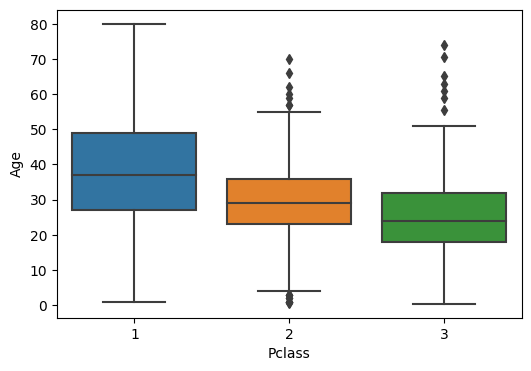

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = train)
plt.show()

### Observation:
We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
We'll use these average age values to impute based on Pclass for Age.



In [10]:
#We can impute average age by creating a function-

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age
                  

#### Let's apply that function

In [11]:
train['Age'] = train[['Age' , 'Pclass']].apply(impute_age , axis = 1)

#### Now let's check that heatmap again!

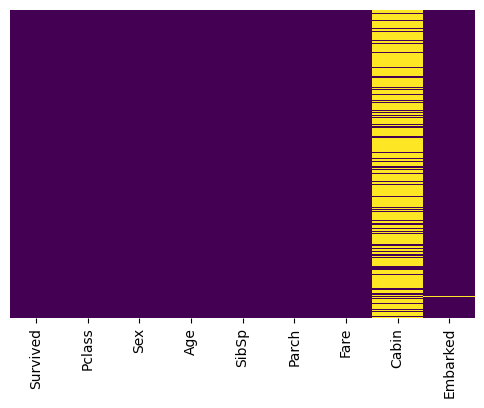

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(train.isnull() , yticklabels=False , cbar = False , cmap = 'viridis')
plt.show()

In [13]:
#Drop cabin

train.drop('Cabin' , axis = 1 , inplace = True)

In [14]:
#Dropping the rowns having NaN/NaT values under certain label

train.dropna(subset = ['Embarked'], inplace=True)

In [15]:
train.reset_index(inplace = True)

#### Now let's check that heatmap again!

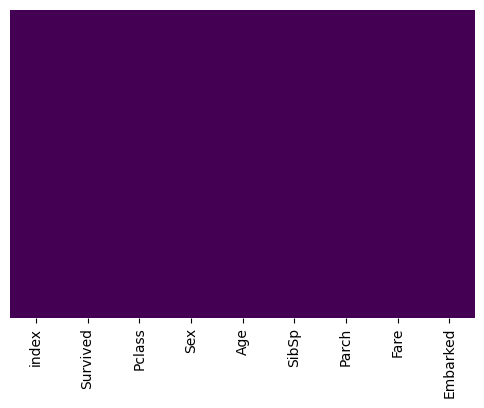

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(train.isnull() , yticklabels=False , cbar = False , cmap = 'viridis')
plt.show()

#### Observation:
* So we have successfully handled all missing values.
* Now we can see that the we aren't seeing any missing values in heatmap.

#### Let's see our cleaned data

In [17]:
train.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


#### Let's get some more information about data 

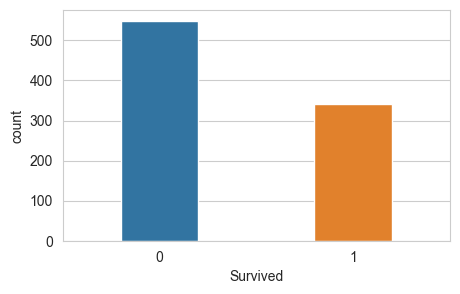

In [18]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data = train , x = 'Survived' , width = 0.4)
plt.show()

#### Observation:
* We can see that the more than 500 pessenger didn't survive.
* Around 330 pessengers have survived.
    

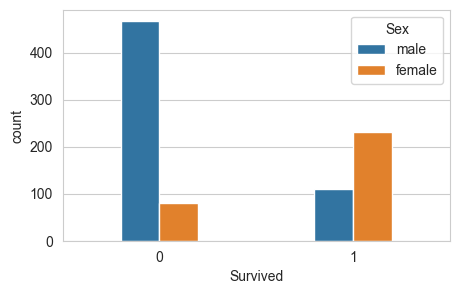

In [19]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data = train , x = 'Survived' , hue = 'Sex' , width = 0.4)
plt.show()

#### Observation:

* So More than 450 men didn't survive as compared to female.
* we can see that the more than 200 female pessenger survived as compared to mens.


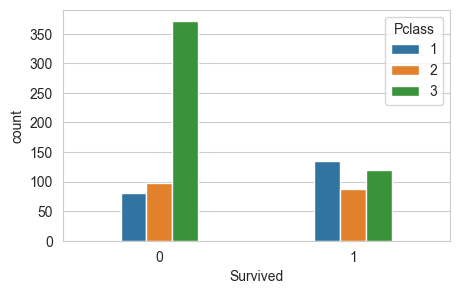

In [20]:

plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data = train , x = 'Survived' , hue = 'Pclass' , width = 0.4)
plt.show()

#### Observation:
* In terms of pessenger class who didn't survive were from third class.
* those pessengers who were in first class they had survived/

C:\Users\DELL\AppData\Local\Temp\ipykernel_8400\1636903335.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'] ,kde = False, bins = 40)


<Axes: xlabel='Age'>

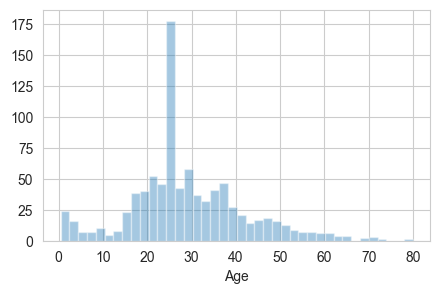

In [21]:
plt.figure(figsize=(5,3))
sns.distplot(train['Age'] ,kde = False, bins = 40)

#### Observation:

We can see that the most of the pessengers are between 20 to 30 years of age group.

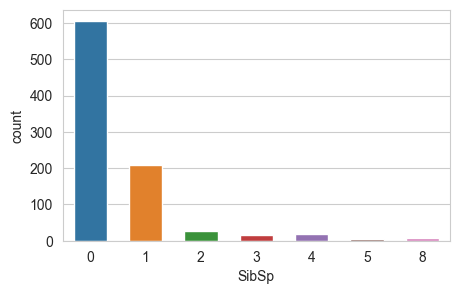

In [22]:
plt.figure(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(data = train ,x = 'SibSp' , width = 0.6)
plt.show()

#### Observation:
* Most of the pessengers are travelling alone followed by couples. 

<Axes: >

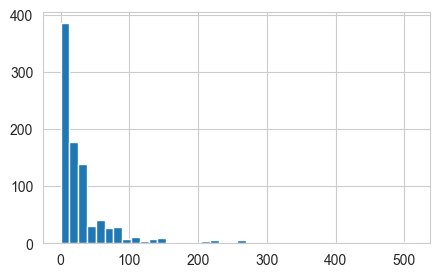

In [23]:
train['Fare'].hist(bins = 40 , figsize = (5,3))

#### Observation:
    
So the most of fare < 100.  


In [24]:
train.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     889 non-null    int64  
 1   Survived  889 non-null    int64  
 2   Pclass    889 non-null    int64  
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [26]:
sex = pd.get_dummies(train['Sex'] , drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
embarked = pd.get_dummies(train['Embarked'] , drop_first = True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
train.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


In [31]:
train.drop(['Sex' , 'Embarked'] ,axis = 1, inplace=True)

In [32]:
train.head()

,index,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0,3,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,2,1,3,26.0,0,0,7.9250
3,3,1,1,35.0,1,0,53.1000
4,4,0,3,35.0,0,0,8.0500


In [33]:
train = pd.concat([train , sex , embarked] , axis = 1)

In [34]:
train.head()

,index,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0
2,2,1,3,26.0,0,0,7.9250,0,0,1
3,3,1,1,35.0,1,0,53.1000,0,0,1
4,4,0,3,35.0,0,0,8.0500,1,0,1


#### Great! Now our data is ready for machine learning model.